In [10]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [11]:
fish = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Turime lentelę su 7 žuvų rūšim, bei įvairiais jų išmatavimais. Vienas iš jų yra svoris - tai bus mūsų target stulpelis. Sukurkite tiesinės regresijos modelį, kuris pagal kitus lentelės stulpelius spėlios žuvies svorį. Išsiaiškinkite, ar yra trūkstamų reikšmių, atsispausdinkite keletą diagramų ir histogramų, patyrinėkite tendencijas ir koreliacijas. Kilus neaiškumams, remkitės paskaitos medžiaga. Sėkmės!

In [12]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [13]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [14]:
dummies = pd.get_dummies(fish['Species'])
dummies

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
154,0,0,0,0,0,1,0
155,0,0,0,0,0,1,0
156,0,0,0,0,0,1,0
157,0,0,0,0,0,1,0


In [15]:
data = pd.concat([fish, dummies], axis=1)
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [16]:
data.drop('Species', axis=1, inplace=True)
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Weight     159 non-null    float64
 1   Length1    159 non-null    float64
 2   Length2    159 non-null    float64
 3   Length3    159 non-null    float64
 4   Height     159 non-null    float64
 5   Width      159 non-null    float64
 6   Bream      159 non-null    uint8  
 7   Parkki     159 non-null    uint8  
 8   Perch      159 non-null    uint8  
 9   Pike       159 non-null    uint8  
 10  Roach      159 non-null    uint8  
 11  Smelt      159 non-null    uint8  
 12  Whitefish  159 non-null    uint8  
dtypes: float64(6), uint8(7)
memory usage: 8.7 KB


In [19]:
features_names = data.columns[1:]
features = data[features_names]
features.head()

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [20]:
target = data['Weight']
target.head(10)

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
5    450.0
6    500.0
7    390.0
8    450.0
9    500.0
Name: Weight, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

In [172]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=13)

In [173]:
features_train.head(), target_train.head()

(     Length1  Length2  Length3   Height   Width  Bream  Parkki  Perch  Pike  \
 42      19.4     21.0     23.7   6.1146  3.2943      0       0      0     0   
 116     36.5     39.0     41.4  11.1366  7.4934      0       0      1     0   
 18      30.9     33.5     38.6  15.6330  5.1338      1       0      0     0   
 155     11.7     12.4     13.5   2.4300  1.2690      0       0      0     0   
 151     11.3     11.8     13.1   2.2139  1.2838      0       0      0     0   
 
      Roach  Smelt  Whitefish  
 42       1      0          0  
 116      0      0          0  
 18       0      0          0  
 155      0      1          0  
 151      0      1          0  ,
 42     120.0
 116    900.0
 18     610.0
 155     13.4
 151     10.0
 Name: Weight, dtype: float64)

In [117]:
from sklearn.linear_model import LinearRegression

In [174]:
fish_reg_model = LinearRegression().fit(features_train, target_train)
target_prediction = fish_reg_model.predict(features_test)
target_prediction

array([ 859.03839063,  520.89815465,  382.78396474,   -4.08238557,
        194.7224619 ,  362.6317373 ,  997.64284082,  248.62265708,
        388.76457132,  932.85737785, 1192.36575781,   44.73755749,
        244.35284944,  302.17720203,  892.06941792,  204.97141028,
        -72.80419052,  630.13255562,  180.76090335,  649.71629821,
        386.09052526,  884.16524337,   59.02253075,  469.3161195 ,
        374.78589441,  567.69495186,  589.35197252,   17.02786331,
        142.74416303,  238.32589289,  154.74093939,  148.25823129,
        556.77072985,   63.09111221, 1350.81412681,  389.50162105,
        857.87332051,  133.7702877 ,  214.18056342,  -47.2479073 ,
        699.13786733,  302.83609694,  179.96391356,  498.84560317,
        747.34782559,  197.83717562, 1102.71432502,  275.89461567,
        -23.79275944,  741.90049226,  296.09715201,   64.2328488 ,
        264.03353267])

In [175]:
target_prediction = pd.Series(data=target_prediction, name='weight_guess')
target_prediction.head()

0    859.038391
1    520.898155
2    382.783965
3     -4.082386
4    194.722462
Name: weight_guess, dtype: float64

In [176]:
target_comparison = pd.concat([target_test.reset_index(), target_prediction], axis=1)
target_comparison.head()

,index,Weight,weight_guess
0,30,920.0,859.038391
1,54,390.0,520.898155
2,131,300.0,382.783965
3,152,9.9,-4.082386
4,66,140.0,194.722462


In [177]:
target_comparison = target_comparison.set_index('index')
target_comparison.head()

,Weight,weight_guess
index,,
30,920.0,859.038391
54,390.0,520.898155
131,300.0,382.783965
152,9.9,-4.082386
66,140.0,194.722462


In [178]:
final_comparison = pd.concat([target_comparison, fish['Species']], axis=1)
final_comparison[final_comparison['Weight'] > 0]

,Weight,weight_guess,Species
30,920.0,859.038391,Bream
54,390.0,520.898155,Roach
131,300.0,382.783965,Pike
152,9.9,-4.082386,Smelt
66,140.0,194.722462,Parkki
104,265.0,362.631737,Perch
127,1000.0,997.642841,Perch
97,145.0,248.622657,Perch
106,250.0,388.764571,Perch
33,975.0,932.857378,Bream


In [179]:
final_comparison.loc[final_comparison['Species'] == 'Smelt'].min()

Weight                6.7
weight_guess   -72.804191
Species             Smelt
dtype: object

<AxesSubplot: xlabel='Weight', ylabel='weight_guess'>

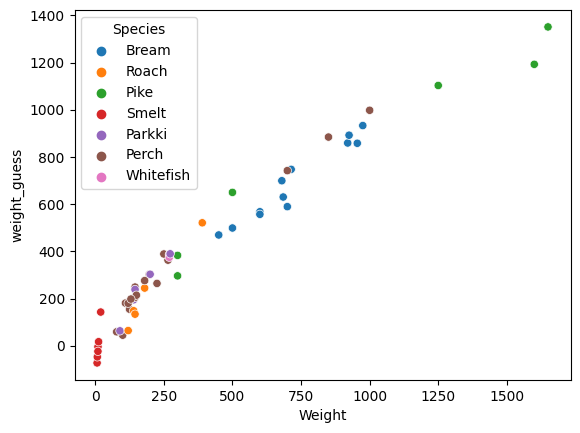

In [187]:
sns.scatterplot(final_comparison, x='Weight', y='weight_guess', hue='Species')

<AxesSubplot: >

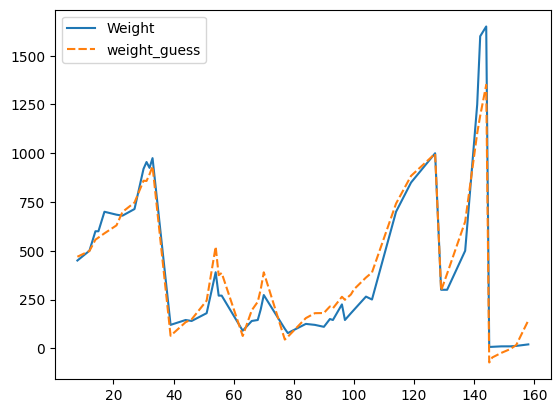

In [197]:
sns.lineplot(final_comparison)

<Figure size 800x600 with 0 Axes>

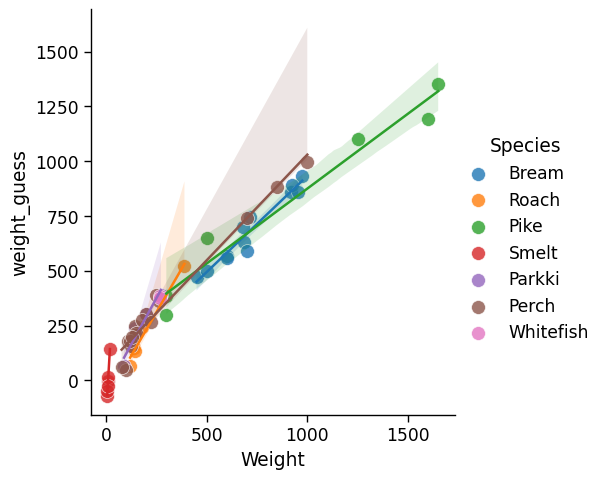

In [212]:
plt.pyplot.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(final_comparison, x='Weight', y='weight_guess', hue='Species', scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

<AxesSubplot: xlabel='Weight', ylabel='weight_guess'>

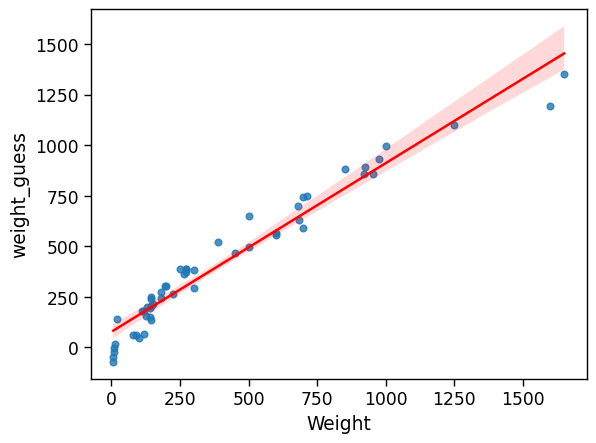

In [217]:
sns.regplot(final_comparison, x='Weight', y='weight_guess', line_kws={'color': 'red'})

In [231]:
import plotly.express as px

In [236]:
fig = px.scatter(final_comparison, x='Weight', y='weight_guess', color='Species')
fig.show()